In [2]:
from pathlib import Path
import json

import pandas as pd
import geopandas as gpd

from sqlalchemy import URL, create_engine, text as sql_text

In [3]:
credentials = Path("../../inputs/db_credentials.json")

# DATABASE SETUP
with open(credentials, "r") as f:
    credentials = json.load(f)

user = credentials["user"]
password = credentials["password"]
host = credentials["host"]
port = credentials["port"]
database = credentials["database"]

url_object = URL.create(
    "postgresql",
    username=user,
    password=password,
    host=host,
    port=port,
    database=database
)

# create a SQLAlchemy engine object
engine = create_engine(url_object)

In [7]:
# query = """SELECT * FROM climate_nldas2
#            WHERE station_id = '63468'
#            AND date >= '2000-01-01'
#            AND date <= '2022-12-31'
#            ORDER BY date;"""

lon, lat = -89.5193315, 34.3662867
start_date = '2000-01-01'
end_date = '2022-12-31'

query =f"""
SELECT geom, date, station_id,
	month, day, year,
	max_air_temperature, min_air_temperature,
	precip,
	dew_point,
	sky_cover,
	wind_speed,
	wind_direction,
	solar_radiation,
	storm_type_id,
	potential_et,
	actual_et,
	input_units_code
FROM climate_nldas2
WHERE 
	station_id = (SELECT station_id FROM find_nearest_nldas2_station({lon}, {lat}))
AND date >= '{start_date}' AND date <= '{end_date}';
"""


# df_clim = pd.read_sql(
#     sql=sql_text(query),
#     con=engine.connect()
# )

gdf_clim = gpd.read_postgis(sql=sql_text(query), con=engine.connect(), geom_col='geom')

In [8]:
gdf_clim

,geom,date,station_id,month,day,year,max_air_temperature,min_air_temperature,precip,dew_point,sky_cover,wind_speed,wind_direction,solar_radiation,storm_type_id,potential_et,actual_et,input_units_code
0,POINT (-89.5625 34.3125),2000-01-01,34620,1,1,2000,20.85,10.80,0.0000,4.628125,None,3.472655,231.35356,117.231250,None,2.6269,None,1
1,POINT (-89.5625 34.3125),2000-01-02,34620,1,2,2000,25.14,11.23,0.0000,9.347873,None,6.779464,212.55570,114.222916,None,3.2811,None,1
2,POINT (-89.5625 34.3125),2000-01-03,34620,1,3,2000,22.41,11.70,13.0124,13.502321,None,8.732176,167.39865,73.366000,None,2.7046,None,1
3,POINT (-89.5625 34.3125),2000-01-04,34620,1,4,2000,10.73,1.55,0.0000,3.098611,None,5.500382,116.88734,54.419918,None,2.1733,None,1
4,POINT (-89.5625 34.3125),2000-01-05,34620,1,5,2000,7.07,-2.84,0.0422,-6.493325,None,2.347522,257.98444,125.391250,None,2.2295,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,POINT (-89.5625 34.3125),2022-12-27,34620,12,27,2022,7.05,-4.66,0.0000,-4.459620,None,2.258964,209.82439,122.429170,None,1.5914,None,1
8397,POINT (-89.5625 34.3125),2022-12-28,34620,12,28,2022,14.35,-2.30,0.0000,-3.182371,None,6.301812,335.57070,122.021670,None,1.7803,None,1
8398,POINT (-89.5625 34.3125),2022-12-29,34620,12,29,2022,16.35,10.50,11.5168,2.744423,None,7.360583,336.17030,58.674500,None,1.1662,None,1
8399,POINT (-89.5625 34.3125),2022-12-30,34620,12,30,2022,17.43,11.56,1.7504,11.159142,None,5.338963,330.00183,44.616750,None,0.7207,None,1


<Axes: xlabel='date'>

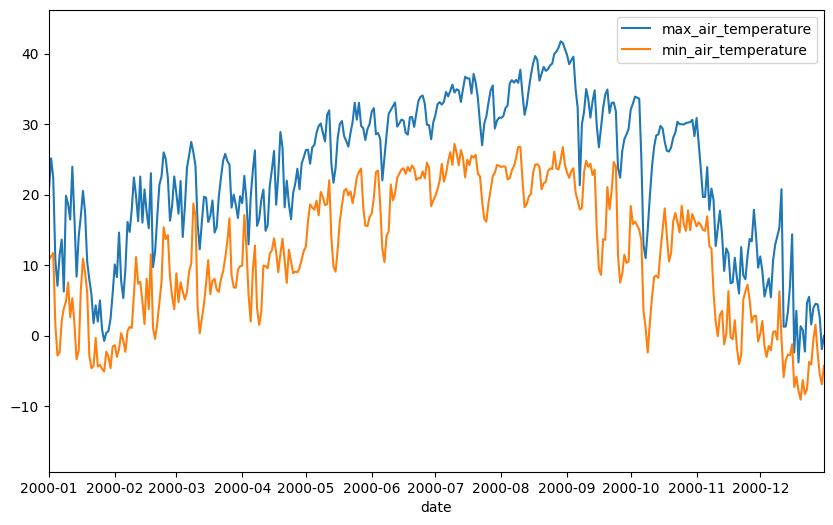

In [9]:
gdf_clim[['date','precip','max_air_temperature', 'min_air_temperature']].plot(x='date', 
                                                                              y=['max_air_temperature', 'min_air_temperature'],
                                                                              figsize=(10, 6),
                                                                              xlim=('2000-01-01', '2000-12-31'))

In [16]:
query = """
SELECT geom, date,
	max_air_temperature, min_air_temperature,
	precip,
	dew_point,
	sky_cover,
	wind_speed,
	wind_direction,
	solar_radiation,
	storm_type_id,
	potential_et,
	actual_et
FROM climate_nldas2
WHERE date >= '2000-01-01' AND date <= '2000-01-07';
"""

gdf_snap = gpd.read_postgis(sql=sql_text(query), con=engine.connect(), geom_col='geom')

In [17]:
gdf_snap

,geom,date,max_air_temperature,min_air_temperature,precip,dew_point,sky_cover,wind_speed,wind_direction,solar_radiation,storm_type_id,potential_et,actual_et
0,POINT (-90.1875 35.0625),2000-01-07,12.700000,0.470000,0.0000,-1.565798,None,2.090924,187.491930,113.798164,None,1.8896,None
1,POINT (-89.9375 35.0625),2000-01-07,12.430000,0.470000,0.1157,-2.193204,None,2.268542,186.304210,114.013664,None,1.9027,None
2,POINT (-89.8125 35.0625),2000-01-07,12.370000,0.850000,0.1102,-2.344897,None,2.282548,186.742720,113.132080,None,1.9227,None
3,POINT (-89.5625 35.0625),2000-01-07,12.330000,1.310000,0.1919,-1.944624,None,2.578394,188.262530,115.134160,None,1.9864,None
4,POINT (-90.3125 34.9375),2000-01-07,12.850000,1.030000,0.0572,-1.507709,None,1.771945,188.673770,115.393585,None,1.9272,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727547,POINT (-67.3125 45.8125),2000-01-01,-3.519989,-15.200012,0.0308,-7.867920,None,3.290759,54.216910,67.436290,None,0.5575,None
727548,POINT (-77.8125 48.4375),2000-01-01,-3.940002,-14.679993,10.2691,-11.124573,None,0.113994,75.608230,49.939793,None,0.2966,None
727549,POINT (-76.3125 41.1875),2000-01-01,6.500000,-2.920013,0.0000,1.042511,None,3.532412,18.257565,98.206795,None,0.8232,None
727550,POINT (-116.0625 45.8125),2000-01-01,0.339996,-4.290008,1.7536,-1.630829,None,5.639282,61.374672,56.512463,None,0.8990,None


In [18]:
import numpy as np
import xarray as xr

lons = np.arange(-124.9375, -67.0625+0.125, 0.125) 
lats = np.arange(25.0625,    52.9375+0.125, 0.125)

# Assuming you have a list of unique dates from the geodataframe
unique_dates = gdf_snap['date'].unique()
unique_dates.sort()

# Get the column names, excluding 'date' and 'geom'
data_cols = [col for col in gdf_snap.columns if col not in ['date', 'geom']]

# Create the 3D data arrays
num_days = len(unique_dates)
num_cols = len(data_cols)
num_lats = len(lats)
num_lons = len(lons)

data_3d = np.zeros((num_days, num_cols, num_lats, num_lons))

# Populate the 3D arrays from the geodataframe
date_idx = np.searchsorted(unique_dates, gdf_snap['date'])
lon_idx = np.searchsorted(lons, gdf_snap['geom'].apply(lambda x: x.x))
lat_idx = np.searchsorted(lats, gdf_snap['geom'].apply(lambda x: x.y))

for col_idx, col in enumerate(data_cols):
    data_3d[:, col_idx, lat_idx, lon_idx] = gdf_snap[col]

# Create the xarray Dataset
ds = xr.Dataset(
    {col: (['time', 'lat', 'lon'], data_3d[:, i, :, :]) for i, col in enumerate(data_cols)},
    coords={
        'time': unique_dates,
        'lon': ('lon', lons),
        'lat': ('lat', lats)
    }
)

In [19]:
ds

<xarray.Dataset> Size: 64MB
Dimensions:              (time: 7, lat: 224, lon: 464)
Coordinates:
  * time                 (time) object 56B 2000-01-01 2000-01-02 ... 2000-01-07
  * lon                  (lon) float64 4kB -124.9 -124.8 ... -67.19 -67.06
  * lat                  (lat) float64 2kB 25.06 25.19 25.31 ... 52.81 52.94
Data variables:
    max_air_temperature  (time, lat, lon) float64 6MB nan nan ... -19.22 -19.87
    min_air_temperature  (time, lat, lon) float64 6MB nan nan ... -27.51 -28.24
    precip               (time, lat, lon) float64 6MB 0.0 0.0 ... 0.7892 0.7682
    dew_point            (time, lat, lon) float64 6MB nan nan ... -23.06 -23.58
    sky_cover            (time, lat, lon) float64 6MB nan nan nan ... nan nan
    wind_speed           (time, lat, lon) float64 6MB nan nan ... 2.511 3.059
    wind_direction       (time, lat, lon) float64 6MB nan nan nan ... 50.64 55.5
    solar_radiation      (time, lat, lon) float64 6MB nan nan ... 45.06 44.94
    storm_type_id        (time, lat, lon) float64 6MB nan nan nan ... nan nan
    potential_et         (time, lat, lon) float64 6MB 0.0 0.0 ... 0.2268 0.2065
    actual_et            (time, lat, lon) float64 6MB nan nan nan ... nan nan

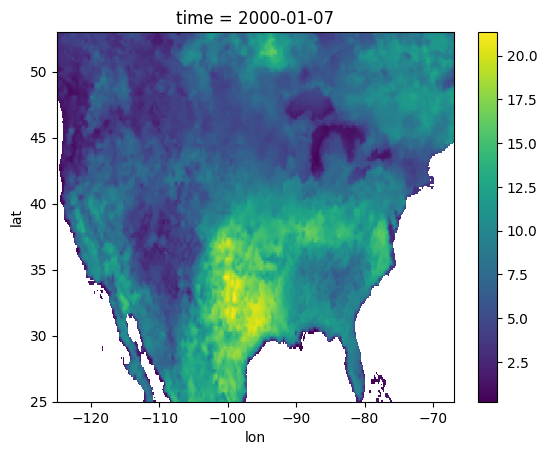

In [22]:
(ds["max_air_temperature"]-ds["min_air_temperature"]).isel(time=-1).plot()